In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

conversion_df = pd.read_csv('conversion.csv')

## Task 1

In [7]:
conversion_df.xyz_campaign_id.nunique()

# answer - 3

3

## Task 2

In [11]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


## Task 3

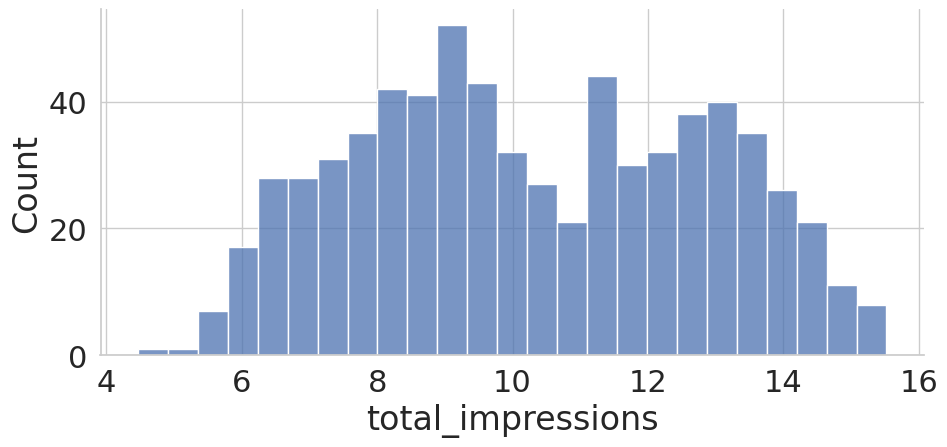

In [52]:
sns.displot(
    (
        conversion_df
        .groupby('fb_campaign_id')
        .agg(total_impressions = ('Impressions', 'sum'))
        .assign(total_impressions = lambda x: np.log(x.total_impressions))
    ), 
    x='total_impressions', aspect=2, bins=25
)
plt.show()
# answer
# 1. Распределение бимодальное
# 2. Полученное распределение не является нормальным

## Task 4

In [61]:
conversion_df_with_ctr = (
    conversion_df
    .assign(CTR = lambda x: x.Clicks / x.Impressions)
    .sort_values('CTR', ascending=False)
)
# answer - 738637

## Task 5 

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


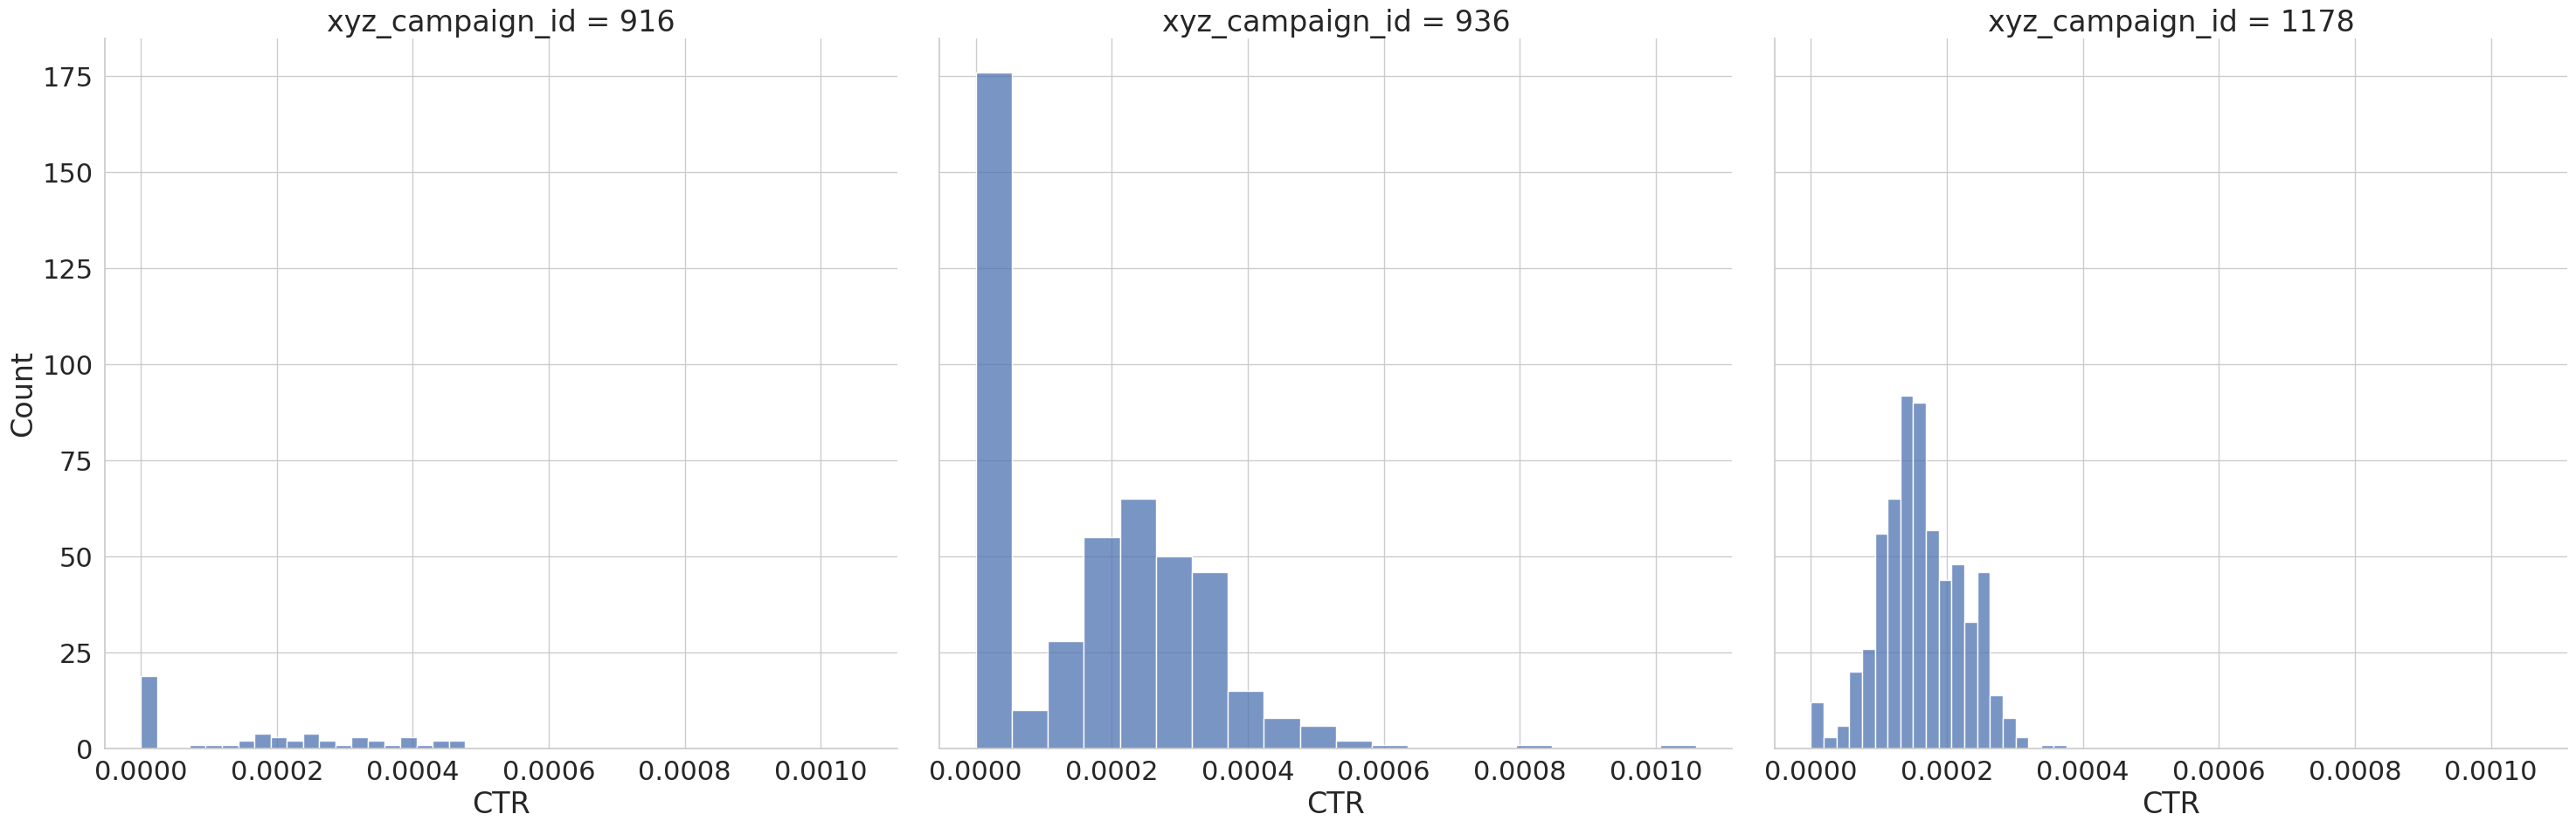

In [96]:
g = sns.FacetGrid(data = conversion_df_with_ctr, col='xyz_campaign_id', height = 10, aspect = 1)
g.map(sns.histplot, 'CTR', bins=20)
plt.show()
# answer - C

## Task 6

In [3]:
sp.stats.iqr(
    conversion_df
    .assign(CPC = lambda x: x.Spent / x.Clicks)
    ['CPC'],
    nan_policy='omit'
).round(2)


0.25

## Task 7

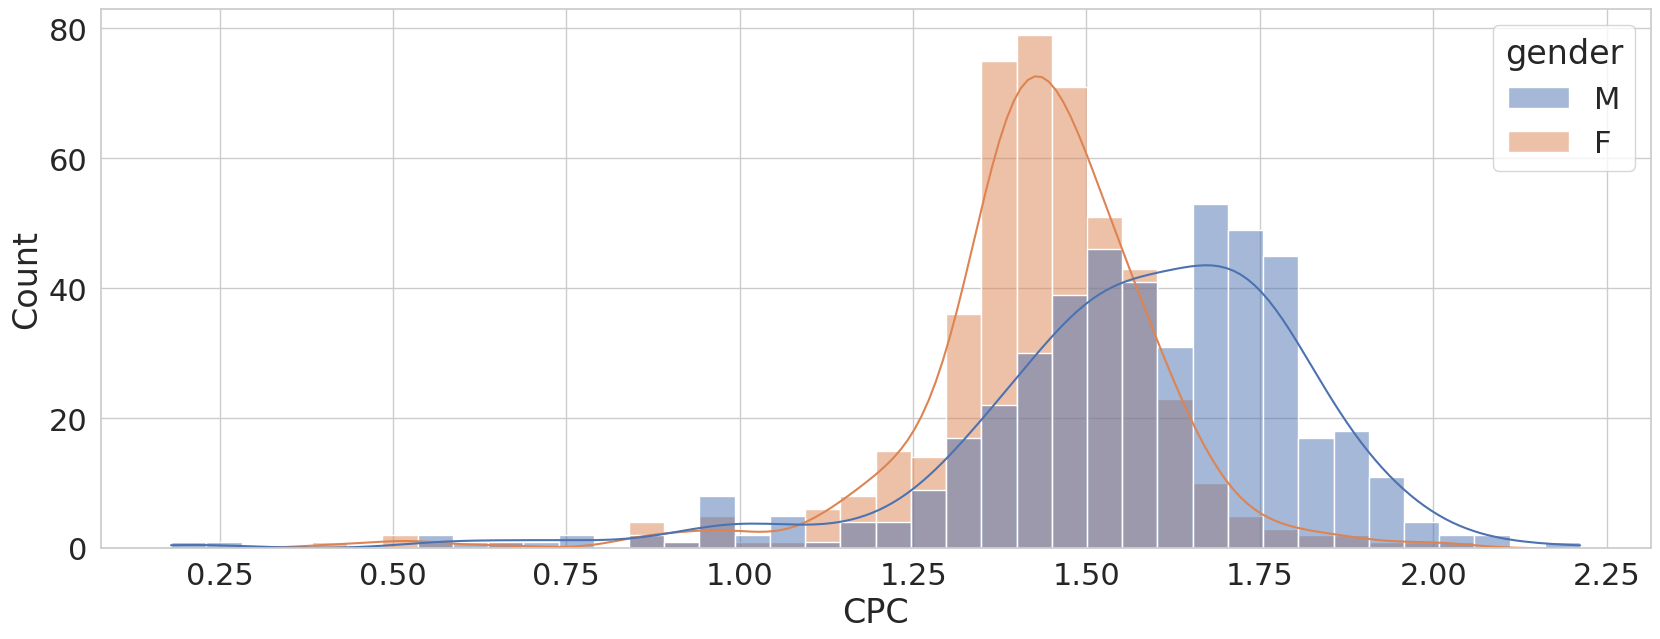

In [121]:
sns.histplot(
    data = (
        conversion_df
        .assign(CPC = lambda x: x.Spent / x.Clicks)
    ),
    x = 'CPC', hue='gender', kde=True
)
plt.show()
# answer - B

## Task 8

In [128]:
(
    conversion_df
    .assign(CR = lambda x: (x.Approved_Conversion / x.Clicks)*100)
    .query("ad_id == 1121814")
)
# answer - 3.09%

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,3.087886
